In [11]:
##import the modules and define the data frames
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


csvpath = os.path.join('..','Resources','city_data.csv')
csvpath2 = os.path.join('..','Resources','ride_data.csv')

city = pd.read_csv(csvpath)
ride =pd.read_csv(csvpath2)

In [12]:
#checking first csv
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
##checking second csv
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [14]:
## merge the two csv
test = pd.merge(city, ride, on='city')
test.sort_values('city', ascending=True)
## df with no duplicate cities
test2 = test.drop_duplicates('city')

In [15]:
## group by city
grouped_data = test.groupby('city')
## calculate the average fare from each group
grouped_data['fare'].mean().head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [16]:
## create new df with reset indexes to help color code the chart
color_assign = city.sort_values('city', ascending=True)
color_assign = color_assign.reset_index(drop=True)


## Bubble Plot of Ride Sharing Data

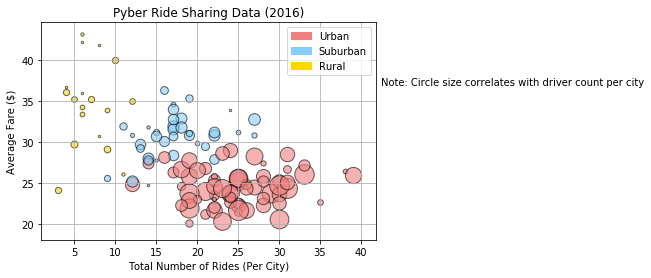

In [22]:
## extra piece that may not be necessary 
bubbles_mpl = plt.figure()

## set some variables to be used when plotting
total_rides = grouped_data['date'].count()
average_fare = grouped_data['fare'].mean()
city_obs = grouped_data['city']
driver_count = grouped_data['driver_count'].sum()/grouped_data['driver_count'].count()
city_type = grouped_data['type']

## iterate through length of groupby object, adding a specific sized and color coded marker to plot
for i in range(len(grouped_data)):
    if color_assign.iloc[i,2] == "Urban":
        color = "lightcoral"
    elif color_assign.iloc[i,2] == "Suburban":
        color = "lightskyblue"
    else:
        color = "gold"
    plt.scatter(total_rides[i],average_fare[i],s=driver_count[i]*5.5 ,c=color, alpha=.6 , edgecolors='black' )

## add labels to chart
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
## add legend to chart(imported module for this, couldn't figure out how to do it another way)
orange_patch = mpatches.Patch(color='lightcoral', label='Urban')
blue_patch = mpatches.Patch(color='lightskyblue', label='Suburban')
yellow_patch = mpatches.Patch(color='gold', label='Rural')
plt.legend(handles=[orange_patch,blue_patch,yellow_patch])
## add footnote to chart
plt.text(42.5, 37, 'Note: Circle size correlates with driver count per city')
plt.grid()




## Total Rides by City Type

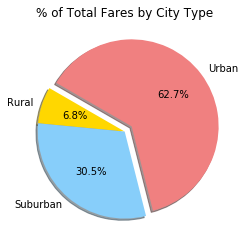

In [18]:
types = test.groupby('type')
total = types['fare'].sum()*100/test['fare'].sum()

fig1, pie1 = plt.subplots()
pie1.pie(total, explode=(0,0,.1), labels=["Rural","Suburban","Urban"], colors=['gold','lightskyblue','lightcoral'], autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.show()

##  Total Rides by City Type

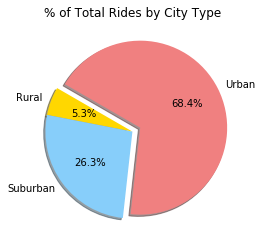

In [19]:
types = test.groupby('type')
total2 = types['city'].count()*100/test['city'].count()

fig2, pie2 = plt.subplots()
pie2.pie(total2, explode=(0,0,.1), labels=["Rural","Suburban","Urban"], colors=['gold','lightskyblue','lightcoral'], autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
plt.show()


## Total Drivers by City Type

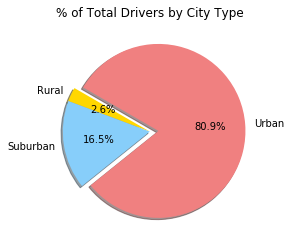

In [20]:
types = test2.groupby('type')
total3 = (types['driver_count'].sum())*100/test2['driver_count'].sum()

fig3, pie3 = plt.subplots()
pie3.pie(total3, explode=(0,0,.1), labels=["Rural","Suburban","Urban"], colors=['gold','lightskyblue','lightcoral'], autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')
plt.show()


## Trends

There is a slight negative correlation between number of average fare and total number of rides. Rural areas on average have higher fares than urban areas. An approximate 19% of drivers account for an approximate 37% of the total fares (Rural + Suburban). It can be inferred that the supply of drivers in urban areas is what drivers average fare price down for these areas, however we would need more data to confirm(urban areas in general have shorter distances to travel, therefore lowering average fare for example).
